# Risk Management

In the previous chapters, we focused on portfolio construction and optimization — building portfolios that aim to maximize return for a given level of risk. In this chapter, we shift our perspective to the other side of the coin: **financial risk management**.

Risk management is a core function in finance and asset management. It involves identifying, quantifying, and mitigating potential losses arising from adverse market developments. While returns are uncertain and often asymmetric, effective risk management helps ensure that losses remain within acceptable boundaries, particularly during volatile or crisis periods.

We begin by introducing methods to **quantify downside risk** using two widely used metrics: **Value at Risk (VaR)** and **Expected Shortfall (ES)**. These measures estimate potential losses over a given time horizon with a specified confidence level — providing insight into the tail behavior of return distributions.

To estimate these risk measures more accurately, we will apply **time series models** that capture both trends and volatility clustering observed in financial markets. This includes **autoregressive (AR) models** to model mean dynamics and **GARCH models** to capture time-varying volatility.

The chapter concludes with a **case study**, where we apply these techniques in practice to monitor risk and evaluate potential risk-avoiding strategies. This will include scenarios like reducing exposure during high-risk periods or dynamically adjusting allocations based on volatility forecasts.

## Risk Measures
To manage and control financial risk, we need tools that quantify potential losses under adverse conditions. Two of the most widely used risk measures in finance are **Value at Risk (VaR)** and **Expected Shortfall (ES)**, also known as Conditional Value at Risk (CVaR).

### Value at Risk (VaR)

Formally, if $L$ denotes portfolio **loss**, the Value at Risk at level $\alpha \in (0, 1)$ is defined as:

$$
\text{VaR}_\alpha = \inf \left\{ x \in \mathbb{R} \mid \mathbb{P}(L \leq x) \geq \alpha \right\}
$$

In this formulation, $\text{VaR}_{0.99} = 0.05$ of daily losses means that, a scenario where losses exceed a threshold of $0.05$ over the specified period (a day) only has a 1\% probability. Or if you like it the other way around, with a confidence of 99\%, losses will not exceed $0.05$ over the specified period.

### Working with Returns

In practice, we usually model **portfolio returns $R$** rather than losses. If we define loss as $L = -R$, then:

$$
\text{VaR}_\alpha^{(R)} = \inf \left\{ r \in \mathbb{R} \mid \mathbb{P}(R \leq r) \geq 1 - \alpha \right\}
$$

Thus, the VaR on returns corresponds to the **lower quantile** of the return distribution. For example, a 1% left-tail VaR of -$0.02$ means that only with a probability of 1\% returns will be equal to or lower than $-0.02$ $within the specified period. 

To keep interpretation consistent, we often report:

$$
\text{VaR}_\alpha = -q_{1 - \alpha}(R)
$$

Where $q_{1 - \alpha}(R)$ is the $(1 - \alpha)$-quantile of returns.

### Expected Shortfall (ES)

VaR tells us the threshold for extreme losses, but not **how bad things get beyond that point**. **Expected Shortfall (ES)** addresses this by capturing the **expectation of the worst-case losses**.

For return-based Expected Shortfall (ES), assuming a continuous return distribution, the ES at confidence level $\alpha$ is defined as:

$$
\text{ES}_\alpha = -\mathbb{E}[R \mid R \leq q_{1 - \alpha}(R)] 
$$

This gives us the **expected return** in the worst $(1 - \alpha)\%$ of scenarios. In other words, we compute the average return **below the Value at Risk threshold** — i.e., in the left tail of the return distribution.

An alternative and more formal representation uses the **average of lower quantiles**. The Expected Shortfall can be rewritten as:

$$
\text{ES}_\alpha = -\frac{1}{1 - \alpha} \int_0^{1 - \alpha} q_u(R) \, du
$$

Where $q_u(R)$ denotes the $u$-quantile of the return distribution.

This form expresses the Expected Shortfall as the **average of all lower quantiles** up to the $(1 - \alpha)$ level — each weighted equally over the interval $[0, 1 - \alpha]$. It reflects the fact that ES incorporates the **entire tail behavior**, not just a single cutoff point like VaR.

### Determining the Value at Risk and Expected Shortfall

Determining the VaR and ES is comparably easy for random variables with the location-scale property. A **location** parameter shifts a distribution to the right or to the left without changing the distribution's shape. A **scale** parameter linearly grows with a random variable if it is multiplied by a constant $c$, i.e., if the random variable $X$ has a scale parameter of $\sigma$, then the random variable $c X$ has a scale parameter of $|c| \sigma$.

For a random variable $X$ with mean $\mu$ and scaling parameter $\sigma$, the random variable:

$$
Z = \frac{X - \mu}{\sigma}
$$

has a location of $\mu = 0$ and a scale parameter of $\sigma = 1$. 

This transformation implies:

$$
X = \mu + \sigma Z
$$

We now derive how the **cumulative distribution function (CDF)** and the **quantile function (inverse CDF)** of $X$ and relate to those to $Z$.

#### Cumulative Distribution Function (CDF)

We start by expressing the CDF of $Z$ in terms of the CDF of $X$:

$$
F_Z(z) = \mathbb{P}(Z \leq z) = \mathbb{P}\left( \frac{X - \mu}{\sigma} \leq z \right)
= \mathbb{P}(X \leq \mu + \sigma z) = F_X(\mu + \sigma z)
$$

This yields the key relation:

$$
F_Z(z) = F_X(\mu + \sigma z)
\quad \Leftrightarrow \quad
F_X(x) = F_Z\left( \frac{x - \mu}{\sigma} \right)
$$

#### 2. Inverse CDF (Quantile Function)

Let $q_\alpha^{(X)}$ denote the $\alpha$-quantile of $X$ and $q_\alpha^{(Z)}$ the corresponding quantile of $Z$. We use the previous result:

$$
F_X(q_\alpha^{(X)}) = \alpha
\quad \Rightarrow \quad
F_Z\left( \frac{q_\alpha^{(X)} - \mu}{\sigma} \right) = \alpha
\quad \Rightarrow \quad
\frac{q_\alpha^{(X)} - \mu}{\sigma} = q_\alpha^{(Z)}
$$

Solving for $q_\alpha^{(X)}$:

$$
q_\alpha^{(X)} = \mu + \sigma \cdot q_\alpha^{(Z)}
$$

#### Summary

- The **CDF of $X$** is a scaled and shifted version of the **CDF of $Z$**.
- The **quantile function** of $X$ scales accordingly:
  
$$
\text{VaR}_\alpha^{(X)} = \mu + \sigma \cdot \text{VaR}_\alpha^{(Z)}
$$

$$
\text{ES}_\alpha^{(X)} = \mu + \sigma \cdot \text{ES}_\alpha^{(Z)}
$$

- This relationship holds whenever $X$ belongs to a **location-scale family**, i.e., $X = \mu + \sigma Z$ for some standardized $Z$.

### Applications and Challenges

Both **Value at Risk (VaR)** and **Expected Shortfall (ES)** are widely used tools for quantifying financial risk. They provide risk managers, regulators, and investors with a statistical estimate of how much a portfolio could lose over a given time period at a specified confidence level.

In practice, these measures are used to:
- Assess portfolio risk under normal market conditions
- Set capital reserves or risk limits (e.g., in banks and funds)
- Monitor changes in portfolio risk over time
- Inform rebalancing or hedging decisions

VaR is simple and intuitive — it tells us the worst expected loss over a time horizon with a given probability. ES, on the other hand, provides **deeper insight into tail risk** by accounting for the **magnitude of losses beyond VaR**.

Despite their usefulness, both VaR and ES are subject to important limitations:

- **Model Risk**: Both measures depend on the assumed distribution of returns. If the model is misspecified (e.g., assuming normality in heavy-tailed markets), the risk may be severely underestimated.
  
- **Estimation Uncertainty**: Especially in short or unstable time windows, estimates of VaR and ES can be noisy and sensitive to sampling variation — particularly for ES, which depends on few extreme observations.

- **Liquidity and Market Impact**: In real markets, large positions may not be easily liquidated at quoted prices. VaR and ES assume immediate execution at prevailing prices, ignoring **liquidity risk** and **market impact**.

- **Non-stationarity**: Financial markets evolve. Historical estimates may not reflect future dynamics, and structural breaks (e.g., crises) can invalidate models calibrated on past data.

VaR and ES are valuable tools for **measuring and communicating downside risk**, but they should not be viewed as definitive or fail-safe. In practice, risk management requires more than point estimates — it demands **scenario thinking**, **robust modeling**, and **awareness of practical frictions** such as liquidity constraints, leverage effects, and systemic spillovers.

## Unconditional and Conditional Risk Measurement

In risk management, a key decision is whether to rely on **unconditional** or **conditional** estimates of risk. Both approaches aim to quantify downside risk using measures like **Value at Risk (VaR)** or **Expected Shortfall (ES)**, but they differ fundamentally in how they treat the dynamics of financial returns.

### Unconditional Risk Estimation

Unconditional risk estimates are based on a **long historical window** and assume that the return distribution is **stationary over time**. A typical example is the **empirical quantile method**, where the $\alpha$-level of, e.g., VaR is calculated as:

$$
\text{VaR}_\alpha = -q_{1 - \alpha}(R_{\text{hist}})
$$

Where $R_{\text{hist}}$ is a long series of past returns. This approach is straightforward to compute, easy to interpret, and relatively robust to short-term noise.

**Advantages**:
- Simple to implement and communicate
- Requires no model assumptions
- Smooths over temporary fluctuations and estimation noise

**Limitations**:
- Ignores time-varying behavior in risk (e.g., volatility clustering)
- May underestimate or overestimate current risk if market conditions shift
- Not responsive to crises or regime changes

### Conditional Risk Estimation with Time Series Models

Conditional risk measures, by contrast, explicitly model the **evolving nature of risk** over time. By using models like **AR-GARCH**, we can generate forecasts of the conditional mean and volatility of returns and estimate conditional risk measures, e.g., a conditional VaR by:

$$
\text{VaR}_{t,\alpha} = \mu_t + \sigma_t \cdot \text{VaR}^{(Z)}_\alpha
$$

Where:
- $\mu_t$ and $\sigma_t$ are time-varying forecasts from the model
- $\text{VaR}^{(Z)}_\alpha$ is based on the quantile of standardized residuals

This approach adapts quickly to new information and captures **volatility clustering**, a common feature in financial returns.

**Advantages**:
- Reflects current market conditions
- Captures volatility dynamics and extreme movements
- Enables forward-looking risk estimation

**Limitations**:
- Requires model specification and estimation
- Sensitive to sample size, misspecification, and outliers
- Forecasts can be noisy and unstable if the model is not well calibrated


#### 🧠 Summary

| Feature                  | Unconditional Risk          | Conditional Risk (AR-GARCH)       |
|--------------------------|-----------------------------|------------------------------------|
| Adaptivity               | Static                      | Time-varying                      |
| Model Assumptions        | None                        | Requires correct model structure  |
| Reaction to new data     | Slow                        | Fast                              |
| Robustness               | High                        | Depends on model and data         |
| Use Case                 | Long-term risk baseline     | Tactical risk forecasting         |

In this subchapter, we explore both approaches in detail. We begin by estimating unconditional risk measures using historical quantiles, and then contrast them with conditional risk forecasts generated by AR-GARCH models. We examine when each method is more appropriate, and how they differ in responsiveness and practical implications.

In comparison to the previous data set, we collect a longer time period of a little extended asset universe including ETFs for stocks treasuries, real estates, gold an oil. For simplicity, we assume a naive investment strategy which invest into each asset with equal weights. 

The output of this cell exhibits the descriptive statistics. As expected certain asset classes such as stocks have higher risk but also higher expected profit, while safe haven assets such as gold or treasures have lower risk but also a lower expected return. The last column shows descriptive statistics of the naive portfolio (PF).

In [1]:
import yfinance as yf
import pandas as pd
from utils import describe_with_moments


tickers = [
    "SPY", # S&P 500 ETF
    "EEM", # Emerging Markets ETF
    "QQQ", # Nasdaq 100 (growth tilt) ETF
    "TLT", # Long Term US Treasuries
    "IEF", # Intermediate Term US Treasuries
    "LQD", # Investment Grade Corporate Bonds
    "GLD", # Gold ETF
    "USO", # Oil ETF
    "VNQ", # REIT ETF
    "SHY"  # Short Term US Treasuries ETF
]

try:
    assets = pd.read_csv("../data/chapter_08/pf_data.csv")
    assets["Date"] = pd.to_datetime(assets["Date"])
    assets.set_index("Date", inplace=True)
except:
    assets = yf.download(tickers, start = "2000-01-01")
    assets = assets.loc[:, "Close"].dropna()
    assets.to_csv("../data/chapter_08/pf_data.csv")

asset_names = ["Emerging Markets", "Gold", "Treasuries (intermediate)", "Corporate Bonds", "Nasdaq 100 (Growth)", "Treasuries (short)", "S&P 500", "Treasuries (long)", "Oil", "REIT"]
assets = assets.pct_change().dropna()
assets.columns = asset_names
assets.loc[:, "PF"] = assets.mean(axis = 1)
describe_with_moments(assets)

,Emerging Markets,Gold,Treasuries (intermediate),Corporate Bonds,Nasdaq 100 (Growth),Treasuries (short),S&P 500,Treasuries (long),Oil,REIT,PF
count,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000
mean,0.000284,0.000405,0.000144,0.000178,0.000622,0.000076,0.000444,0.000176,-0.000166,0.000403,0.000257
std,0.017880,0.011155,0.004383,0.005561,0.014016,0.000955,0.012410,0.009518,0.023049,0.018801,0.007043
min,-0.161662,-0.087808,-0.025073,-0.091111,-0.119788,-0.006566,-0.109424,-0.066683,-0.253150,-0.195137,-0.059489
5%,-0.024706,-0.017426,-0.006875,-0.007230,-0.022656,-0.001297,-0.018477,-0.015079,-0.035890,-0.024397,-0.009895
50%,0.000793,0.000540,0.000242,0.000406,0.001144,0.000000,0.000669,0.000474,0.000649,0.000738,0.000441
95%,0.023518,0.017560,0.007037,0.006868,0.020728,0.001615,0.016922,0.014887,0.033158,0.023101,0.009917
max,0.227699,0.112905,0.034262,0.097677,0.121647,0.009974,0.145197,0.075195,0.166667,0.170065,0.063392
skew,0.556429,-0.176407,0.143103,0.043463,-0.051519,0.376412,0.004285,0.079152,-0.652465,0.015569,-0.259209
kurtosis,18.049768,6.214183,2.682244,57.845981,7.605240,8.459329,14.692654,3.313777,9.960275,16.332171,11.336375


A visualization of the individual assets and the naive portfolio can be examined in the figure below. In this time period, the great financial crisis (GFC) in the years 2007-2009 and the Covid crisis are the most adverse events. If we choose to use unconditional risk measure estimates for risk management, the selection of the time period will have a drastic impact on the risk measure estimte. Risk management is usually from a conservative point of view. Thus, we may want to include the GFC into our estimation, the more data from more calm periods we add to the estimation, the less adverse the risk measures estimate will be. To explore these ideas we compare two time periods, the first uses all data until the end of 2018, the second excludes the GFC and uses data from 2010 until 2019. The estimates are evaluated for the data starting from 2019. 

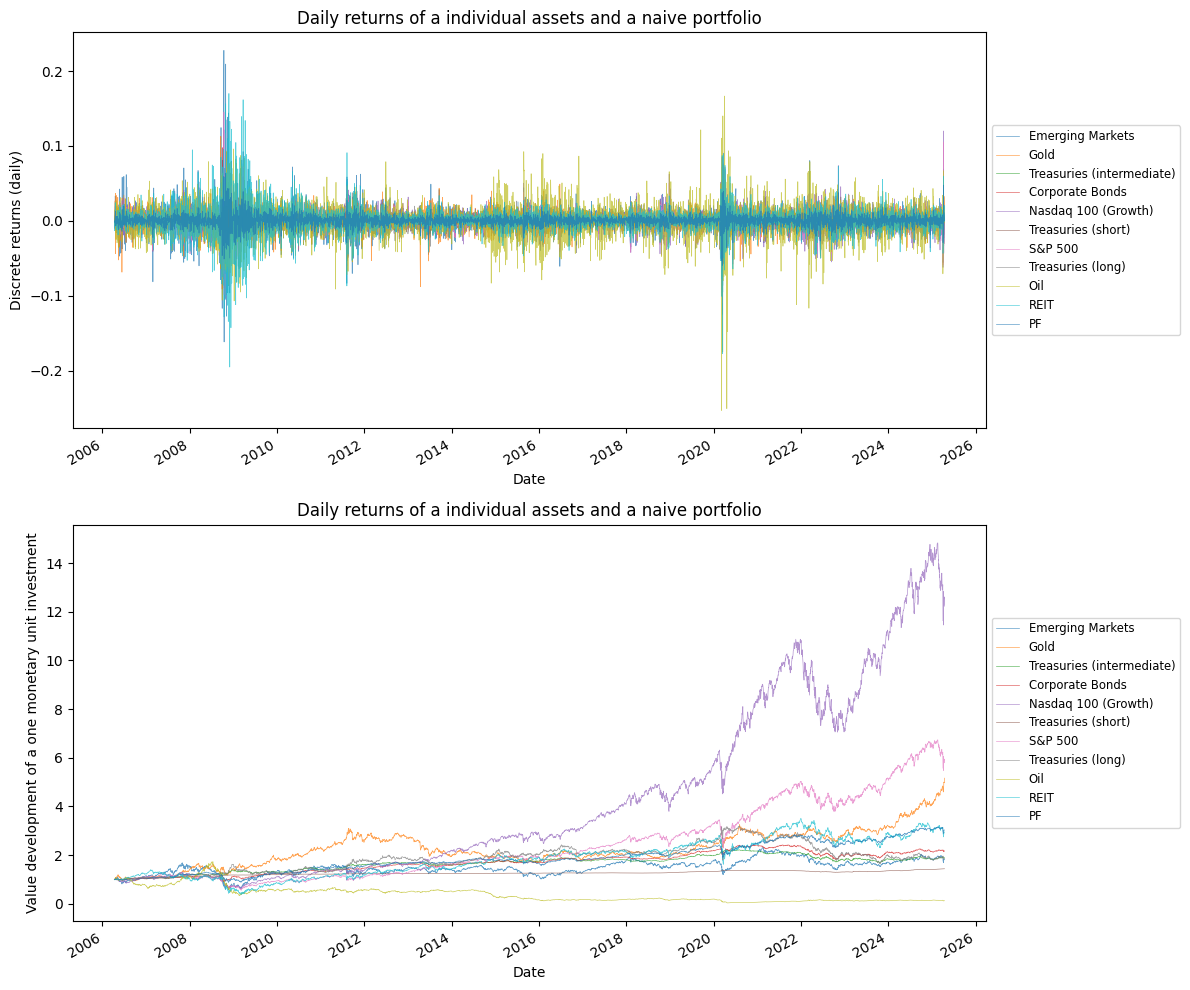

In [2]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(2, 1, figsize=(12, 10))
assets.plot(ax=axs[0], alpha=0.7, title="Daily returns of a individual assets and a naive portfolio", linewidth=0.5)
axs[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, fontsize='small')
axs[0].set_ylabel("Discrete returns (daily)")
assets.add(1.).cumprod().plot(ax=axs[1], alpha=0.7, title="Daily returns of a individual assets and a naive portfolio", linewidth=0.5)
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, fontsize='small')
axs[1].set_ylabel("Value development of a one monetary unit investment")

plt.tight_layout()
plt.show()

Below you can find the descriptive statistics for the two different estimation and the evaluation data. Especially when comparing the minimum and the 5\% quantile of the two estimation data sets to the corresponding estimates of the evaluation data, we observe that the estimates excluding the GFC might be not conservative enough while the one including the GFC may be too conservative. 

In [3]:
from utils import describe_with_moments, empirical_value_at_risk, empirical_expected_shortfall


cutoff_date = pd.to_datetime("2019-01-01")

estimation_data_with_crisis = assets.loc[:cutoff_date]
estimation_data_without_crisis = assets.loc[pd.to_datetime("2010-01-01"):cutoff_date]
evaluation_data = assets.loc[cutoff_date:]

descriptive_statistics = pd.concat(
    [
        describe_with_moments(estimation_data_with_crisis["PF"]),
        describe_with_moments(estimation_data_without_crisis["PF"]),
        describe_with_moments(evaluation_data["PF"])
    ], axis = 1
)

descriptive_statistics.columns = ["Estimation with GFC", "Estimation wo GFC", "Evaluation"]
descriptive_statistics

,Estimation with GFC,Estimation wo GFC,Evaluation
count,3203.000000,2264.000000,1582.000000
mean,0.000231,0.000207,0.000309
std,0.007027,0.005162,0.007075
min,-0.050952,-0.029589,-0.059489
5%,-0.009934,-0.008080,-0.009709
50%,0.000420,0.000390,0.000495
95%,0.009879,0.008036,0.010012
max,0.063392,0.027572,0.047679
skew,0.140746,-0.165823,-1.053488
kurtosis,10.290155,2.837517,13.435337


One of the most fundamental ways to evaluate the performance of a Value at Risk (VaR) model is to compare the **observed exceedance frequency** — how often actual losses exceed the VaR threshold — with the **theoretical exceedance frequency** implied by the chosen confidence level.

For example, a 99% daily VaR implies that we expect losses to exceed the VaR threshold on **1% of days**, or roughly **1 out of every 100 trading days**. If the model is well-calibrated, the proportion of actual exceedances over a long evaluation period should be close to this theoretical rate.

This approach is often called **backtesting VaR**. It is simple yet powerful: if the model underestimates risk, we will observe **too many exceedances**; if it overestimates risk, **exceedances will be too rare**. A well-calibrated model should strike a balance, delivering realistic risk estimates that match the chosen level of protection.

Also note that usually one combines this approach with another test if exceedances occur independent over time. We keep it simple at this point and take a look at the frequency of days where the return is lower than the 1\% quantile. This is the same as examining the exceedances of losses (negative returns) over a VaR with 99\% confidence level. 

If you take a look at the output of the cell below, we observe that none of the unconditional estimates suceeds. The one using the GFC is too conservative, the one excluding the GFC is not conservative enough and underestimates risk. 

In [4]:
VaR_exceedance_GFC = (-evaluation_data["PF"] > empirical_value_at_risk(estimation_data_with_crisis["PF"], 0.99)).mean()
VaR_exceedance_wo_GFC = (-evaluation_data["PF"] > empirical_value_at_risk(estimation_data_without_crisis["PF"], 0.99)).mean()

print(f"Value at risk exceedances between 2019 and 2025 when using estimate including the great financial crisis in the past: {VaR_exceedance_GFC:.4f}")
print(f"Value at risk exceedances between 2019 and 2025 when using estimate excluding the great financial crisis in the past: {VaR_exceedance_wo_GFC:.4f}")

Value at risk exceedances between 2019 and 2025 when using estimate including the great financial crisis in the past: 0.0063
Value at risk exceedances between 2019 and 2025 when using estimate excluding the great financial crisis in the past: 0.0202


Thus, we now take a look at what happens if we estimate the VaR by using a dynamic condtional approach. We choose a model which uses a time-varying mean, an AR(1), and a time-varying volatiltiy, by a GARCH(1, 1), model. We use data until 2019 to estimate the parameters. The estimated model output can be seen below and shows familiar characteristics, especially a high persistence of volatility. With the estimation data, residuals are determined by:

$$
Z_t = \frac{X_t - \mu_t}{\sigma_t} 
$$

Next, the unconditional quantile $q_{1 - \alpha}(Z)$ is estimated. In sample (so with data until 2019) and out of sample (using the same parameters for the data starting in 2019), the VaR can be estimated by:

$$
\text{VaR}_{t,\alpha} = \hat{\mu}_t + \hat{\sigma}_t \cdot  -\hat{q}_{1 - \alpha}(Z) = \hat{\mu}_t + \hat{\sigma}_t \cdot \hat{\text{VaR}}^{(Z)}_\alpha
$$

In [5]:
import pandas as pd
from arch import arch_model

returns = assets["PF"].multiply(100)
cutoff_date = pd.to_datetime("2019-01-01")

model = arch_model(returns, mean="AR", lags = 1, vol='GARCH', p=1, q=1)
garch_fit = model.fit(disp="off", last_obs=cutoff_date)

print(garch_fit.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                     PF   R-squared:                       0.006
Mean Model:                        AR   Adj. R-squared:                  0.006
Vol Model:                      GARCH   Log-Likelihood:               -2594.15
Distribution:                  Normal   AIC:                           5198.29
Method:            Maximum Likelihood   BIC:                           5228.65
                                        No. Observations:                 3202
Date:                Wed, Jun 25 2025   Df Residuals:                     3200
Time:                        09:26:03   Df Model:                            2
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.0314  8.496e-03      3.697  2.183e-

/Users/ralfkellner/Documents/Kurse/FDAML/.venv/lib/python3.12/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/ralfkellner/Documents/Kurse/FDAML/.venv/lib/python3.12/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/ralfkellner/Documents/Kurse/FDAML/.venv/lib/python3.12/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)
/Users/ralfkellner/Documents/Kurse/FDAML/.venv/lib/python3.12/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/ralfkellner/Documents/Kurse/FDAML/.venv/lib/python3.12/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/ralfkellner/Documents/Kurse/FDAML/.venv/lib/python3.12/site-p

If we follow this procedure and quantify the exceedance ratios, we observe an almost perfect exceedance ratio for the (in sample) estimation data and an improvement to the unconditional approach from before for the (out of sample) evaluation period. 

In [6]:
import numpy as np

unconditional_quantile = np.quantile(garch_fit.std_resid.dropna(), 0.01)
mu_t_in_sample = returns.loc[:cutoff_date] - garch_fit.resid.loc[:cutoff_date]
sigma_t_in_sample = garch_fit.conditional_volatility.loc[:cutoff_date]
VaR_t_in_sample = mu_t_in_sample + sigma_t_in_sample * unconditional_quantile

forecast = garch_fit.forecast(align = "target")
mu_t_out_of_sample = forecast.mean["h.1"]
sigma_t_out_of_sample = forecast.variance["h.1"].apply(np.sqrt) 
VaR_t_out_of_sample = mu_t_out_of_sample + sigma_t_out_of_sample * unconditional_quantile

cond_vol = garch_fit.conditional_volatility  # in-sample vol
forecast_vol = forecast.variance["h.1"]**0.5  # out-of-sample forecasted vol (sqrt to get std)

VaR_analysis = pd.DataFrame({
    "Returns": returns,
    "Conditional Volatility": cond_vol, 
    "Forecasted Volatility": forecast_vol,
    "VaR_in_sample": VaR_t_in_sample,
    "VaR_out_of_sample": VaR_t_out_of_sample
})
VaR_analysis["Hitting Event"] = pd.concat([VaR_analysis["Returns"] < VaR_analysis["VaR_in_sample"] , VaR_analysis["Returns"] < VaR_analysis["VaR_out_of_sample"]], axis = 1).any(axis = 1) 
VaR_analysis["Leave Signal"] = pd.concat([VaR_analysis["Conditional Volatility"] > returns.loc[:cutoff_date].std() * 1.1 , VaR_analysis["Forecasted Volatility"] > returns.loc[:cutoff_date].std()* 1.1], axis = 1).any(axis = 1) 

conditional_VaR_in_sample_exceedances = (VaR_analysis["Returns"].loc[:cutoff_date] < VaR_analysis["VaR_in_sample"].loc[:cutoff_date]).mean()
conditional_VaR_out_of_sample_exceedances = (VaR_analysis["Returns"].loc[cutoff_date:] < VaR_analysis["VaR_out_of_sample"].loc[cutoff_date:]).mean()

print(f"Value at risk exceedances between 2010 and 2018 when using time-varying value at risk estimates: {conditional_VaR_in_sample_exceedances:.4f}")
print(f"Value at risk exceedances between 2019 and 2025 when using time-varying value at risk estimates: {conditional_VaR_out_of_sample_exceedances:.4f}")

Value at risk exceedances between 2010 and 2018 when using time-varying value at risk estimates: 0.0103
Value at risk exceedances between 2019 and 2025 when using time-varying value at risk estimates: 0.0139


The exceedance ratios are promising that the conditional VaR estimates are well suited for capturing time-varying quantile levels of the returns. The figure below plots returns togehter with time-varying 1\% quantiles (so the negative of the VaR). The light grey dotted vertical lines represent days at which the return falls below the conditional quantile value (this is the same as the loss exceeding the VaR). We see that risk levels (measures by quantiles) dramatically increase during crisis periods and adverse economic conditions. While an unconditional 1\% quantile would be equal to approximately -2\% (when using data until 2019), we observe conditional 1\% quantile levels up to -8\% during crisis periods. 

While this helps us to better understand the actual loss levels during adverse economic conditions, we may also think about avoiding riskier assets during times when conditional risk measures increase. The increase in losses is mainly linked to increasing volatilities during crisis periods. So let us try a relatively simple approach to shift investments to safer assets when volatilities rise. 

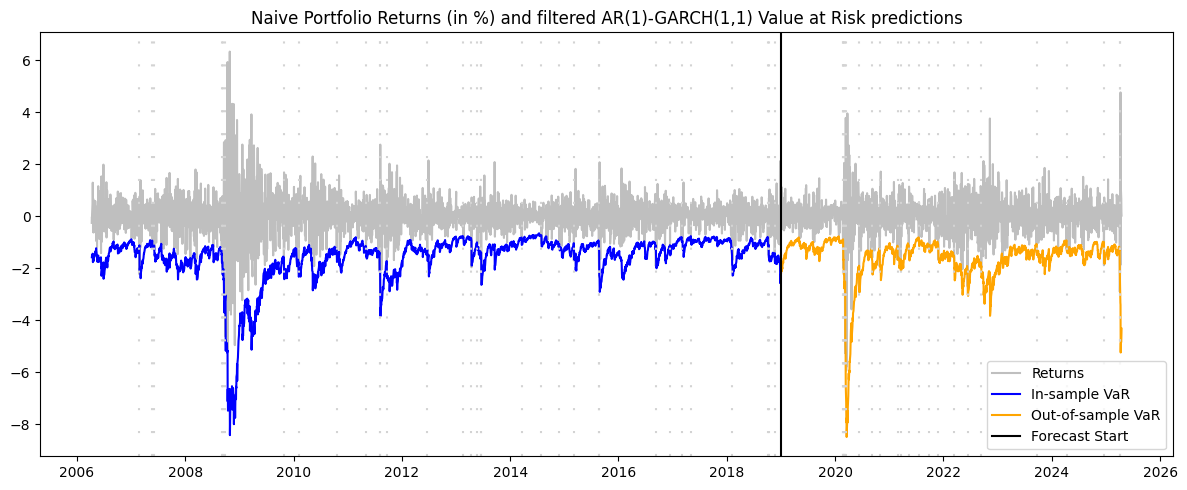

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(VaR_analysis["Returns"], label="Returns", color="gray", alpha=0.5)
plt.plot(VaR_analysis["VaR_in_sample"], label="In-sample VaR", color="blue")
plt.plot(VaR_analysis["VaR_out_of_sample"], label="Out-of-sample VaR", color="orange")
plt.axvline(cutoff_date, color="black", linestyle="-", label="Forecast Start")
for event_date in VaR_analysis.index[VaR_analysis["Hitting Event"]]:
    plt.axvline(event_date, color="lightgrey", linestyle=(0, (1, 10)))
plt.title("Naive Portfolio Returns (in %) and filtered AR(1)-GARCH(1,1) Value at Risk predictions")
plt.legend()
plt.tight_layout()
plt.show()

The figure below shows returns together with conditional volatility forecasts. The dotted black line represents the unconditional return volatility of the estimation period. We create a signal which is True if the conditional volatility forecast is higher then the unconditional volatility. If this happens we assume that more adverse economic conditions arise. If this happens, we shift all funds with equal parts to gold and a short term treasury ETF. During other times, we stick to the naive portfolio. The grey shaded areas mark times during which money is allocated to safer investments. 

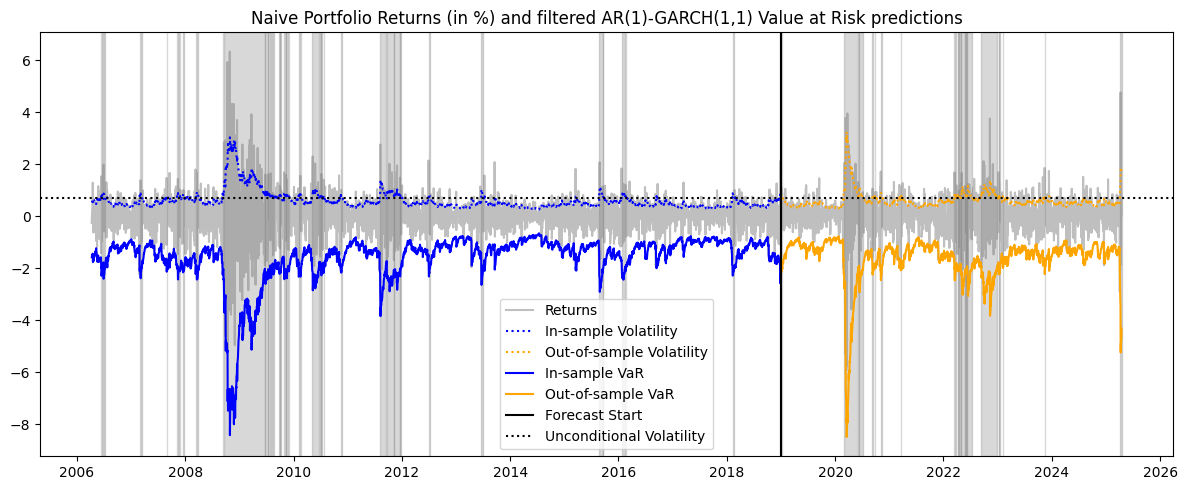

In [8]:
signal = VaR_analysis["Leave Signal"].astype(bool)

# Create a shifted version to detect transitions
signal_shift = signal.shift(1, fill_value=False)
# Start of True periods: when signal goes from False to True
starts = signal[(signal == True) & (signal_shift == False)].index
# End of True periods: when signal goes from True to False
ends = signal[(signal == False) & (signal_shift == True)].index
# Handle edge case: signal ends in True
if signal.iloc[-1]:
    ends = ends.append(pd.Index([signal.index[-1]]))
    
plt.figure(figsize=(12, 5))
plt.plot(VaR_analysis["Returns"], label="Returns", color="gray", alpha=0.5)
plt.plot(VaR_analysis["Conditional Volatility"], label="In-sample Volatility", linestyle = "dotted", color="blue")
plt.plot(VaR_analysis["Forecasted Volatility"], label="Out-of-sample Volatility", linestyle = "dotted", color="orange")
plt.plot(VaR_analysis["VaR_in_sample"], label="In-sample VaR", color="blue")
plt.plot(VaR_analysis["VaR_out_of_sample"], label="Out-of-sample VaR", color="orange")
plt.axvline(cutoff_date, color="black", linestyle="-", label="Forecast Start")
plt.axhline(returns.loc[:cutoff_date].std(), color="black", linestyle="dotted", label="Unconditional Volatility")
for start, end in zip(starts, ends):
    plt.axvspan(start, end, color='grey', alpha=0.3)
plt.title("Naive Portfolio Returns (in %) and filtered AR(1)-GARCH(1,1) Value at Risk predictions")
plt.legend()
plt.tight_layout()
plt.show()

Following this strategy leaves us with a well managed portfolio between a naive portfolio and safe investments, only. The figure below exhibits returns and value development of these strategies. The "Vola-Switched" strategy would have avoided the drastic loss during March 2020 which is the period with the most adverse value development during the Covid crisis. Furthermore, its value steadily increases without drastic changes during the whole time period. 

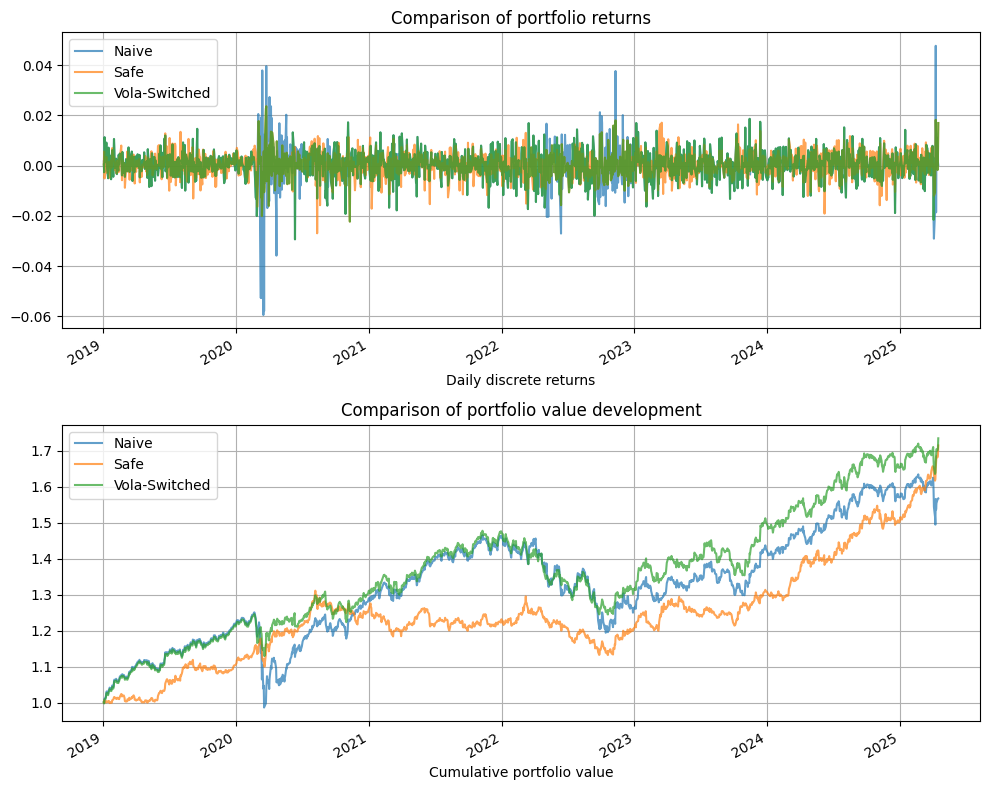

In [9]:
returns_naive = assets.drop(["PF"], axis = 1).mean(axis = 1).loc[cutoff_date:]
returns_safe = assets.loc[:, ["Gold", "Treasuries (short)"]].mean(axis = 1).loc[cutoff_date:]
strategy_return = returns_naive.where(~signal, returns_safe).loc[cutoff_date:]

pf_returns = pd.concat(
    [
        returns_naive,
        returns_safe,
        strategy_return  
    ], axis = 1
)

pf_returns.columns = ["Naive", "Safe", "Vola-Switched"]

fig, axs = plt.subplots(2, 1, figsize = (10,8))
pf_returns.plot(alpha = 0.7, ax = axs[0])
(1 + pf_returns).cumprod().plot(alpha = 0.7, ax = axs[1])
axs[0].grid()
axs[0].set_xlabel("Daily discrete returns")
axs[0].set_title("Comparison of portfolio returns")
axs[1].grid()
axs[1].set_xlabel("Cumulative portfolio value")
axs[1].set_title("Comparison of portfolio value development")

fig.tight_layout()

The risk adjusted performance is better than the naive portfolio, the slightly worse performance in comparison to the safe investments is mostly driven by recent events during which the Trump administration started a trade war which caused high demands and increasing prices of safe haven investments. 

In [10]:
from utils import describe_with_moments

pf_returns_descriptives = describe_with_moments(pf_returns)
pf_returns_descriptives.loc["mean"] / pf_returns_descriptives.loc["std"]

Naive            0.043699
Safe             0.070912
Vola-Switched    0.065476
dtype: float64

Taking a look at the VaR and ES values also shows that the flight to safe investment strategy reduces tail risks in comparison to holding a naive portfolio. 

In [11]:
from utils import empirical_value_at_risk, empirical_expected_shortfall

print("VaR levels at a 0.99 confidence level:")
pf_returns.apply(lambda x: empirical_value_at_risk(x, 0.99))

VaR levels at a 0.99 confidence level:


Naive            0.018685
Safe             0.012814
Vola-Switched    0.015947
dtype: float64

In [12]:
print("ES levels at a 0.975 confidence level:")
pf_returns.apply(lambda x: empirical_value_at_risk(x, 0.975))

ES levels at a 0.975 confidence level:


Naive            0.013162
Safe             0.009998
Vola-Switched    0.011660
dtype: float64

In this chapter, we explored foundational approaches to financial risk measurement, with a focus on Value at Risk (VaR) and Expected Shortfall (ES) as tools for quantifying downside risk. We contrasted unconditional risk estimates — based on long historical windows — with conditional approaches that adapt to changing market environments using time series models such as AR-GARCH. 

Through empirical analysis, we demonstrated that conditional risk measures offer a more responsive and informative framework for risk monitoring. In particular, time-varying volatility estimates allowed for the early detection of elevated risk levels, which can be used to guide dynamic portfolio decisions.

We illustrated this in a practical case study, where a strategy that reallocated capital to safe-haven assets (e.g., gold or short-term government bonds) during periods of forecasted high volatility outperformed a naive benchmark. This underlined the value of integrating **forward-looking risk estimates** into investment decision-making and showcased how **conditional risk models** can serve not only as diagnostic tools but also as the foundation for **risk-mitigating strategies** in real-world portfolios.